In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [72]:
test_data = pd.read_csv("data/test.csv")

In [95]:
ss = pd.read_csv("data/test.csv")

In [96]:
ss.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [73]:
print(test_data.shape)

(367, 12)


In [74]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [75]:
print(test_data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [76]:
#checking for unique values in each column such that we could whether there are any incorrect dtypes
for i in test_data.columns:
  print("no of unique values and dtype:","|",i,"|",test_data[i].nunique(),"|",test_data[i].dtype)

no of unique values and dtype: | Loan_ID | 367 | object
no of unique values and dtype: | Gender | 2 | object
no of unique values and dtype: | Married | 2 | object
no of unique values and dtype: | Dependents | 4 | object
no of unique values and dtype: | Education | 2 | object
no of unique values and dtype: | Self_Employed | 2 | object
no of unique values and dtype: | ApplicantIncome | 314 | int64
no of unique values and dtype: | CoapplicantIncome | 194 | int64
no of unique values and dtype: | LoanAmount | 144 | float64
no of unique values and dtype: | Loan_Amount_Term | 12 | float64
no of unique values and dtype: | Credit_History | 2 | float64
no of unique values and dtype: | Property_Area | 3 | object


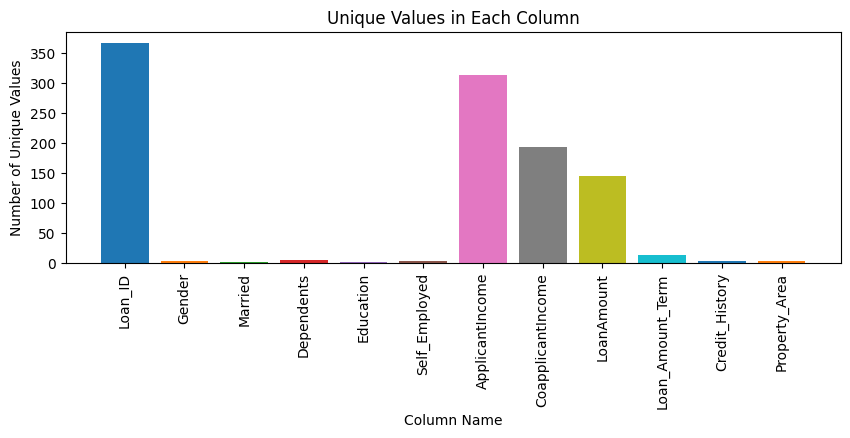

In [77]:
fig, ax = plt.subplots(figsize=(10, 3))
# Iterating over the columns
for col in test_data.columns:
    # Calculate the number of unique values in the column
    num_unique = len(test_data[col].unique())
    # Plot a bar for each column
    ax.bar(col, num_unique)
# Customize the chart
ax.set_xlabel('Column Name')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Unique Values in Each Column')
plt.xticks(rotation=90)

# Show the chart
plt.show()


In [78]:
missing_cols = test_data.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)

Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64


In [79]:
# Categorical Mode Imputation
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Loan_Amount_Term: Most common value is usually 360
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)

# LoanAmount: Median is safer due to outliers
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

test_data['Credit_History'] = test_data['Credit_History'].astype('category')

In [80]:
test_data["TotalIncome"] = test_data["CoapplicantIncome"] + test_data["ApplicantIncome"]

In [81]:
test_data['LoanAmount_log']=np.log1p(test_data['LoanAmount'])
test_data["CoapplicantIncome_log"] = np.log1p(test_data['CoapplicantIncome'])
test_data["ApplicantIncome_log"] = np.log1p(test_data['ApplicantIncome'])
test_data["TotalIncome_log"] = np.log1p(test_data['TotalIncome'])

In [82]:
# Recalculate engineered features after imputation
test_data['LoanToIncomeRatio'] = test_data['LoanAmount_log'] / (test_data['ApplicantIncome_log'] + test_data['CoapplicantIncome_log'])
bins = [0, 100, 200, 700]
labels = ['Low', 'Medium', 'High']
test_data['LoanAmount_Bin'] = pd.cut(test_data['LoanAmount_log'], bins=bins, labels=labels)

In [83]:
test_data["Dependents"].value_counts()

Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64

In [84]:
#Binning the loan_ammount_term_will be better because more than continous variable it is looking like a categorical column
bins = [0, 60, 180, 300, test_data["Loan_Amount_Term"].max()]
labels = ['Very Short', 'Short', 'Medium', 'Long']
test_data['Loan_Amount_Term_Bin'] = pd.cut(test_data['Loan_Amount_Term'], bins=bins, labels=labels, right=True)
#feature_engineering:-lets build new features from the exisitng columns

test_data['EMI'] = test_data['LoanAmount'] * 1000 / test_data['Loan_Amount_Term']
test_data['EMI_log']=np.log1p(test_data['EMI'])
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,TotalIncome,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log,LoanToIncomeRatio,LoanAmount_Bin,Loan_Amount_Term_Bin,EMI,EMI_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,...,5720,4.709530,0.000000,8.651899,8.651899,0.544335,Low,Long,305.555556,5.725399
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,...,4576,4.844187,7.313887,8.031710,8.428799,0.315673,Low,Long,350.000000,5.860786
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,...,6800,5.342334,7.496097,8.517393,8.824825,0.333615,Low,Long,577.777778,6.360919
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,...,4886,4.615121,7.842671,7.758333,8.494334,0.295822,Low,Long,277.777778,5.630415
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,...,3276,4.369448,0.000000,8.094684,8.094684,0.539792,Low,Long,216.666667,5.382965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,...,5786,4.736198,7.483244,8.296547,8.663369,0.300143,Low,Long,313.888889,5.752220
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,...,4867,4.753590,6.565265,8.333030,8.490438,0.319069,Low,Long,319.444444,5.769709
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,...,5243,4.844187,7.597898,8.086718,8.564840,0.308850,Low,Long,350.000000,5.860786
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,...,7393,5.068904,7.780721,8.517393,8.908424,0.311012,Low,Long,438.888889,6.086522


In [85]:
def encode_categorical(df, method='label'):
    """
    Encodes all categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        method (str): 'label' for Label Encoding, 'onehot' for One-Hot Encoding

    Returns:
        pd.DataFrame: DataFrame with encoded categorical columns
    """
    df_encoded = df.copy()
    cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

    if method == 'label':
        le = LabelEncoder()
        for col in cat_cols:
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    elif method == 'onehot':
        df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=True)

    else:
        raise ValueError("Encoding method must be either 'label' or 'onehot'")

    return df_encoded

test_encoded_df = encode_categorical(test_data, method='label')  # or 'onehot'

In [86]:
test_encoded_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,TotalIncome,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log,LoanToIncomeRatio,LoanAmount_Bin,Loan_Amount_Term_Bin,EMI,EMI_log
0,0,1,1,0,0,0,5720,0,110.0,360.0,...,5720,4.709530,0.000000,8.651899,8.651899,0.544335,0,0,305.555556,5.725399
1,1,1,1,1,0,0,3076,1500,126.0,360.0,...,4576,4.844187,7.313887,8.031710,8.428799,0.315673,0,0,350.000000,5.860786
2,2,1,1,2,0,0,5000,1800,208.0,360.0,...,6800,5.342334,7.496097,8.517393,8.824825,0.333615,0,0,577.777778,6.360919
3,3,1,1,2,0,0,2340,2546,100.0,360.0,...,4886,4.615121,7.842671,7.758333,8.494334,0.295822,0,0,277.777778,5.630415
4,4,1,0,0,1,0,3276,0,78.0,360.0,...,3276,4.369448,0.000000,8.094684,8.094684,0.539792,0,0,216.666667,5.382965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,...,5786,4.736198,7.483244,8.296547,8.663369,0.300143,0,0,313.888889,5.752220
363,363,1,1,0,0,0,4158,709,115.0,360.0,...,4867,4.753590,6.565265,8.333030,8.490438,0.319069,0,0,319.444444,5.769709
364,364,1,0,0,0,0,3250,1993,126.0,360.0,...,5243,4.844187,7.597898,8.086718,8.564840,0.308850,0,0,350.000000,5.860786
365,365,1,1,0,0,0,5000,2393,158.0,360.0,...,7393,5.068904,7.780721,8.517393,8.908424,0.311012,0,0,438.888889,6.086522


In [88]:
#Model_building
# split into input (X) and output (y) variables

#Model_building
# split into input (X) and output (y) variables
X = test_encoded_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'LoanToIncomeRatio',
       'LoanAmount_Bin', 'LoanAmount_log', 'CoapplicantIncome_log',
       'ApplicantIncome_log', 'TotalIncome_log', 'Loan_Amount_Term_Bin',
       'EMI_log']]



In [91]:
import pandas as pd
import pickle

# Specify the path to your pickled model
file_path = 'tuned_model\\best_model_lr_2.pkl'

# Load the model
try:
    with open(file_path, 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    loaded_model = None
except Exception as e:
    print(f"Error loading the model: {e}")
    loaded_model = None

# Make predictions if the model was loaded
if loaded_model is not None:
    try:
        y_pred_test = loaded_model.predict(X)

        # Convert the predictions to a Pandas Series or DataFrame
        predictions_series = pd.Series(y_pred_test, name='Predicted_Loan_Status')

        # Optionally, if your X_test has an index you want to keep:
        # predictions_df = pd.DataFrame({'Index': X_test.index, 'Predicted_Loan_Status': y_pred_test})

        # Save the predictions to a CSV file
        output_csv_path = 'output_results/loan_status_predictions_with_all_features.csv'
        predictions_series.to_csv(output_csv_path, index=False)  # index=False to avoid writing the Series index

        print(f"Predictions saved to {output_csv_path}")

    except Exception as e:
        print(f"Error during prediction or saving: {e}")
else:
    print("Prediction and saving steps skipped as the model was not loaded.")

Model loaded successfully!
Predictions saved to output_results/loan_status_predictions_with_all_features.csv


In [92]:
X_best = test_encoded_df[['Gender', 'Married', 'Dependents', 'Credit_History', 'EMI_log']]
import pandas as pd
import pickle

# Specify the path to your pickled model
file_path = 'tuned_model\\best_model_lr_with_best_features.pkl'

# Load the model
try:
    with open(file_path, 'rb') as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    loaded_model = None
except Exception as e:
    print(f"Error loading the model: {e}")
    loaded_model = None

# Make predictions if the model was loaded
if loaded_model is not None:
    try:
        y_pred_test = loaded_model.predict(X)

        # Convert the predictions to a Pandas Series or DataFrame
        predictions_series = pd.Series(y_pred_test, name='Predicted_Loan_Status')

        # Optionally, if your X_test has an index you want to keep:
        # predictions_df = pd.DataFrame({'Index': X_test.index, 'Predicted_Loan_Status': y_pred_test})

        # Save the predictions to a CSV file
        output_csv_path = 'output_results/loan_status_predictions_with_best_features.csv'
        predictions_series.to_csv(output_csv_path, index=False)  # index=False to avoid writing the Series index

        print(f"Predictions saved to {output_csv_path}")

    except Exception as e:
        print(f"Error during prediction or saving: {e}")
else:
    print("Prediction and saving steps skipped as the model was not loaded.")


Model loaded successfully!
Predictions saved to output_results/loan_status_predictions_with_best_features.csv
